In [93]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import time

In [94]:
from sklearn.datasets import load_diabetes

In [95]:
X,y=load_diabetes(return_X_y=True)

In [96]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=2)

In [97]:
lr=LinearRegression()

In [98]:
start = time.time()
lr.fit(X_test,y_test)
print("Training time is: ",time.time()-start)

Training time is:  0.0031316280364990234


In [99]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [100]:
lr.intercept_

np.float64(151.88331005254167)

here we update acc to one row so n=1 and yi represent the actual output value for that row and y_hat represent the predicted value for thatrow

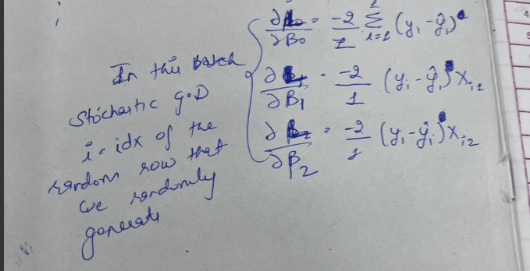

In [101]:
# now writing our own stochastic gradient class which we used while training our model
class Stochastic_Gradient_Descent_Regresor:
 def __init__(self,learning_rate,epochs):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.intercept_=None
    self.coef_=None

 def fit(self,X_train,y_train):
    #this time we will use the stochastic G.D
    #so formula of updating the intercept and coeff changes slightly
    self.intercept_=0;
    self.coef_=np.ones(X_train.shape[1])

    # now we will iterate over the no oe epochs and update the intercept and coeff
    #by randomly selecting a row

    for i in range(self.epochs):
      for j in range(X_train.shape[0]):
        #first we will generate random row
        idx=np.random.randint(0,X_train.shape[0])


        #formula of updation of bias and weights are same

        #new bias=old_bias-(learning_rate)*del(loss)/del(bias)

        #which means we need del(loss)/del(b)

        y_hat=np.dot(X_train[idx],self.coef_)+self.intercept_

        intercept_derivative = -2*(y_train[idx]-y_hat)
        self.intercept_= self.intercept_-(self.learning_rate*intercept_derivative)

        #now its time to find loss w.r.t to weights

        coef_derivative=-2*np.dot((y_train[idx]-y_hat),X_train[idx])
        self.coef_=self.coef_-(self.learning_rate)*coef_derivative

 def predict(self,X_test):
  return np.dot(X_test,self.coef_)+self.intercept_


In [102]:
sgd = Stochastic_Gradient_Descent_Regresor(0.01,40)

In [103]:
sgd.fit(X_train,y_train)

In [104]:
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

The time taken is 0.048447608947753906


In [105]:
y_pred=sgd.predict(X_test)
r2_score (y_test,y_pred)


0.27393262705108257